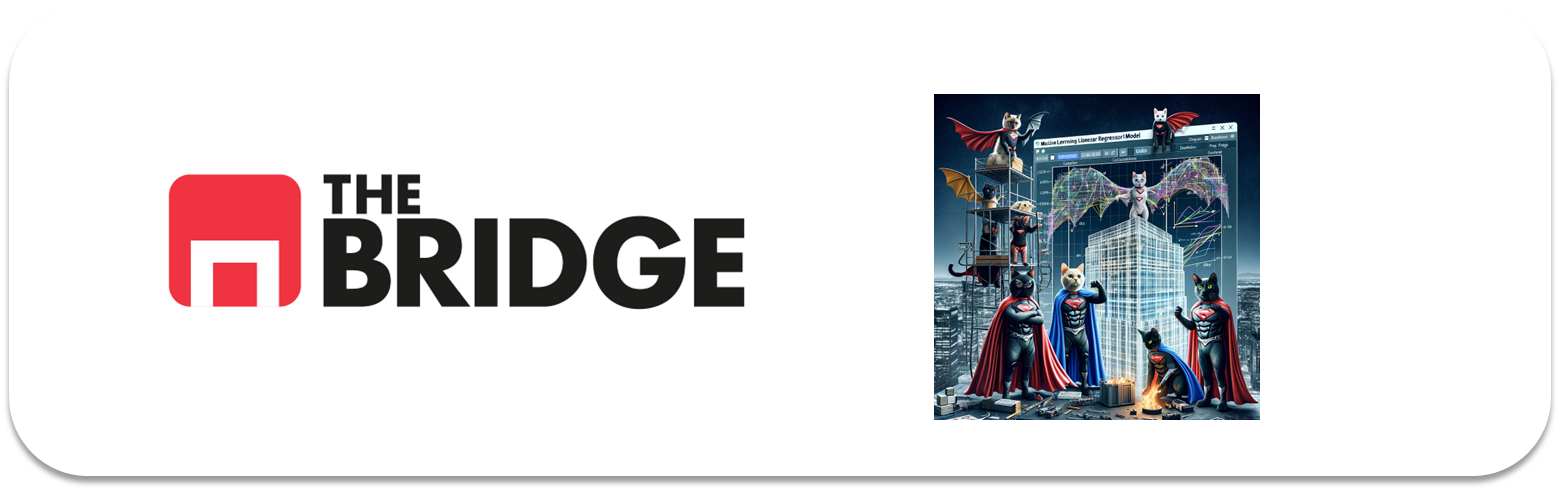

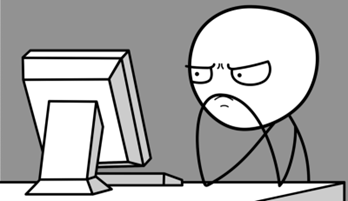

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pprint import pprint
from sklearn.metrics import roc_curve, auc


En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [3]:


# Rutas de los archivos
ruta_adult_data = "C:/Users/hp/Desktop/Python Scripts/adult_data.data"
ruta_adult_test = "C:/Users/hp/Desktop/Python Scripts/adult_test.test"

try:
    # Cargar el archivo de entrenamiento
    adult_data = pd.read_csv(ruta_adult_data, header=None, sep=",", engine="python")
    print("Archivo 'adult_data.data' cargado correctamente.")
    print(adult_data.head())  # Vista previa

    # Cargar el archivo de prueba
    test_data = pd.read_csv(ruta_adult_test, sep=",", header=None, skiprows=1, engine="python")
    print("\nArchivo 'adult_test.test' cargado correctamente.")
    print(test_data.head())  # Vista previa

except FileNotFoundError as e:
    print(f"Error: No se pudo encontrar el archivo. Verifica la ruta.\n{e}")
except pd.errors.ParserError as e:
    print(f"Error: Hubo un problema al analizar el archivo.\n{e}")
except Exception as e:
    print(f"Error inesperado: {e}")


Archivo 'adult_data.data' cargado correctamente.
   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=5

### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [4]:
# Mostrar información básica del dataset de entrenamiento
print("Información del dataset de entrenamiento:")
print(adult_data.info())

# Mostrar las primeras líneas del dataset de entrenamiento
print("\nPrimeras líneas del dataset de entrenamiento:")
print(adult_data.head())

# Variables categóricas
categorical_columns = adult_data.select_dtypes(include=['object']).columns
print("\nVariables categóricas en el dataset de entrenamiento:")
print(categorical_columns)

# Verificar el target (última columna) y su distribución
target_column = adult_data.columns[-1]
print(f"\nColumna target: {target_column}")

print("\nDistribución de valores en la columna target:")
print(adult_data[target_column].value_counts())


Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Primeras líneas del dataset de entrenamiento:
   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


In [8]:

# Dividir los datos en características (X) y target (y)
X = adult_data.drop(columns=[adult_data.columns[-1]])  # Todas las columnas excepto el target
y = adult_data[adult_data.columns[-1]]  # Target (última columna)

# Asegurarse de que todos los nombres de las columnas sean cadenas
X.columns = X.columns.astype(str)

# Identificar las columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding para las columnas categóricas
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Dividir en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurarse de que los nombres de las columnas en X_train y X_test sean cadenas
X_train = pd.DataFrame(X_train, columns=X_train.columns.astype(str))
X_test = pd.DataFrame(X_test, columns=X_test.columns.astype(str))

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar X_train
X_test_scaled = scaler.transform(X_test)  # Usar el mismo ajuste para X_test

# Verificar escalado
print("Media de las características normalizadas (X_train_scaled):")
print(X_train_scaled.mean(axis=0))

print("\nDesviación estándar de las características normalizadas (X_train_scaled):")
print(X_train_scaled.std(axis=0))


Media de las características normalizadas (X_train_scaled):
[ 1.63669242e-16  1.93675270e-17 -6.13759657e-18 -2.42776042e-17
 -2.83693353e-17 -2.37320401e-16 -3.32794125e-17 -3.21882843e-17
 -2.45503863e-18  7.25600306e-17 -3.68255794e-17  1.35027125e-17
 -2.61870787e-17  2.04586552e-18  2.56415146e-17  9.82015452e-18
 -1.90947449e-17  4.05081374e-17 -3.43705408e-17 -2.07314373e-17
  3.95534001e-18  4.79414488e-17 -4.77368622e-18  1.36391035e-17
  6.76499533e-17 -9.27459038e-18  2.72782070e-19  9.00180831e-18
  2.86421173e-18  1.60941421e-17  3.42000520e-17 -1.13204559e-17
 -5.37380678e-17 -8.72902624e-18 -4.66457340e-17  1.52757959e-17
  2.18225656e-18 -4.43270864e-17  6.54676968e-18  2.45844841e-17
 -2.97332456e-17 -4.25540029e-17 -3.60072332e-17 -3.27338484e-18
  1.90947449e-18  2.80965532e-17 -3.60072332e-17  3.31430215e-17
  7.59698065e-17 -2.05268508e-17  1.40482766e-17 -8.10162748e-17
 -3.27338484e-18  4.52818236e-17  3.24610663e-17  4.80096443e-17
  1.82763987e-17  2.14133925e-

### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [10]:



# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento escalados
model.fit(X_train_scaled, y_train)

# Mostrar un mensaje de confirmación
print("Modelo de regresión logística entrenado correctamente.")




Modelo de regresión logística entrenado correctamente.


### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

Matriz de confusión para el conjunto de entrenamiento:
[[18421  1357]
 [ 2484  3786]]


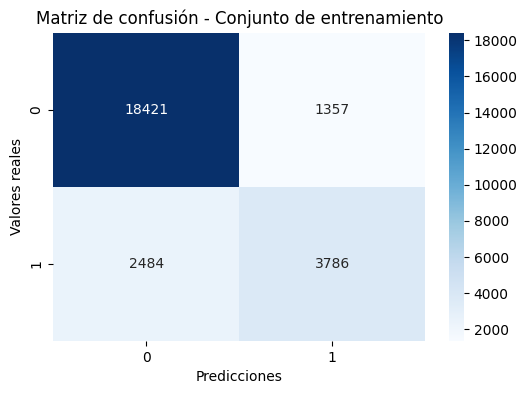


Informe de clasificación para el conjunto de entrenamiento:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     19778
        >50K       0.74      0.60      0.66      6270

    accuracy                           0.85     26048
   macro avg       0.81      0.77      0.78     26048
weighted avg       0.85      0.85      0.85     26048



In [14]:

# Obtener las predicciones para el conjunto de entrenamiento
y_pred_train = model.predict(X_train_scaled)

# Calcular la matriz de confusión
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Matriz de confusión para el conjunto de entrenamiento:")
print(conf_matrix_train)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Conjunto de entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Generar el informe de clasificación
print("\nInforme de clasificación para el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_train))


### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

Matriz de confusión para el conjunto de prueba:
[[4619  323]
 [ 607  964]]


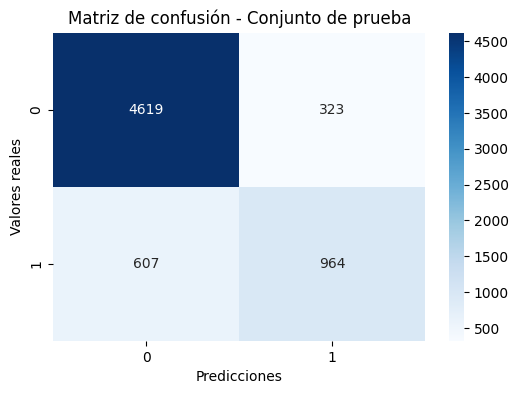


Informe de clasificación para el conjunto de prueba:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4942
        >50K       0.75      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [16]:


# Obtener las predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test_scaled)

# Calcular la matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Matriz de confusión para el conjunto de prueba:")
print(conf_matrix_test)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Conjunto de prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Generar el informe de clasificación
print("\nInforme de clasificación para el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))


### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [17]:


# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]  # Los coeficientes están en un array 2D, seleccionamos la primera fila
caracteristicas = X_train.columns  # Nombres de las características

# Crear un DataFrame para organizar los coeficientes
importancia_coef = pd.DataFrame({
    'Feature': caracteristicas,
    'Coeficiente': coeficientes
})

# Ordenar por la magnitud de los coeficientes
importancia_coef['Importancia_Abs'] = importancia_coef['Coeficiente'].abs()
importancia_coef = importancia_coef.sort_values(by='Importancia_Abs', ascending=False)

# Mostrar los coeficientes ordenados
print("Coeficientes del modelo y su importancia:")
print(importancia_coef[['Feature', 'Coeficiente']])


Coeficientes del modelo y su importancia:
                     Feature  Coeficiente
3                         10     2.258509
30     5_ Married-civ-spouse     1.115409
26              3_ Preschool    -0.570225
2                          4     0.528158
58                   9_ Male     0.415428
..                       ...          ...
72                 13_ Haiti     0.005158
19                    3_ 9th     0.003376
96       13_ Trinadad&Tobago    -0.002996
78                  13_ Iran    -0.002183
31  5_ Married-spouse-absent    -0.000461

[100 rows x 2 columns]


### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

In [21]:


def show_coefs(model, feature_names, figsize=(15, 10)):
    """
    Visualiza los coeficientes del modelo y sus magnitudes absolutas.

    Parameters:
        model: El modelo de regresión logística entrenado.
        feature_names: Lista o índice con los nombres de las características.
        figsize: Tamaño de la figura.
    
    Returns:
        df_coef: DataFrame con los coeficientes y sus magnitudes absolutas.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Crear un DataFrame con los coeficientes
    df_coef = pd.DataFrame({
        "Feature": feature_names,
        "Coeficiente": model.coef_[0]
    })

    # Calcular la magnitud absoluta de los coeficientes
    df_coef["Importancia_Abs"] = df_coef["Coeficiente"].abs()

    # Ordenar para visualización
    df_coef_sorted = df_coef.sort_values(by="Coeficiente")
    df_coef_abs_sorted = df_coef.sort_values(by="Importancia_Abs")

    # Crear las visualizaciones
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    # Gráfico 1: Coeficientes reales
    df_coef_sorted.plot(kind="barh", x="Feature", y="Coeficiente", ax=ax[0], legend=False, color="blue")
    ax[0].set_title("Coeficientes del modelo")
    ax[0].set_xlabel("Valor del Coeficiente")
    ax[0].set_ylabel("Características")

    # Gráfico 2: Magnitud absoluta de los coeficientes
    df_coef_abs_sorted.plot(kind="barh", x="Feature", y="Importancia_Abs", ax=ax[1], legend=False, color="orange")
    ax[1].set_title("Importancia Absoluta de los Coeficientes")
    ax[1].set_xlabel("Magnitud Absoluta")
    ax[1].set_ylabel("Características")

    # Ajustar diseño
    fig.suptitle("Visualización de los Coeficientes del Modelo", fontsize=16)
    plt.tight_layout()

    return df_coef



Coeficientes del modelo:
                Feature  Coeficiente  Importancia_Abs
0                     0     0.350996         0.350996
1                     2     0.081793         0.081793
2                     4     0.528158         0.528158
3                    10     2.258509         2.258509
4                    11     0.245120         0.245120
..                  ...          ...              ...
95         13_ Thailand     0.013011         0.013011
96  13_ Trinadad&Tobago    -0.002996         0.002996
97    13_ United-States     0.115163         0.115163
98          13_ Vietnam    -0.042436         0.042436
99       13_ Yugoslavia     0.020551         0.020551

[100 rows x 3 columns]


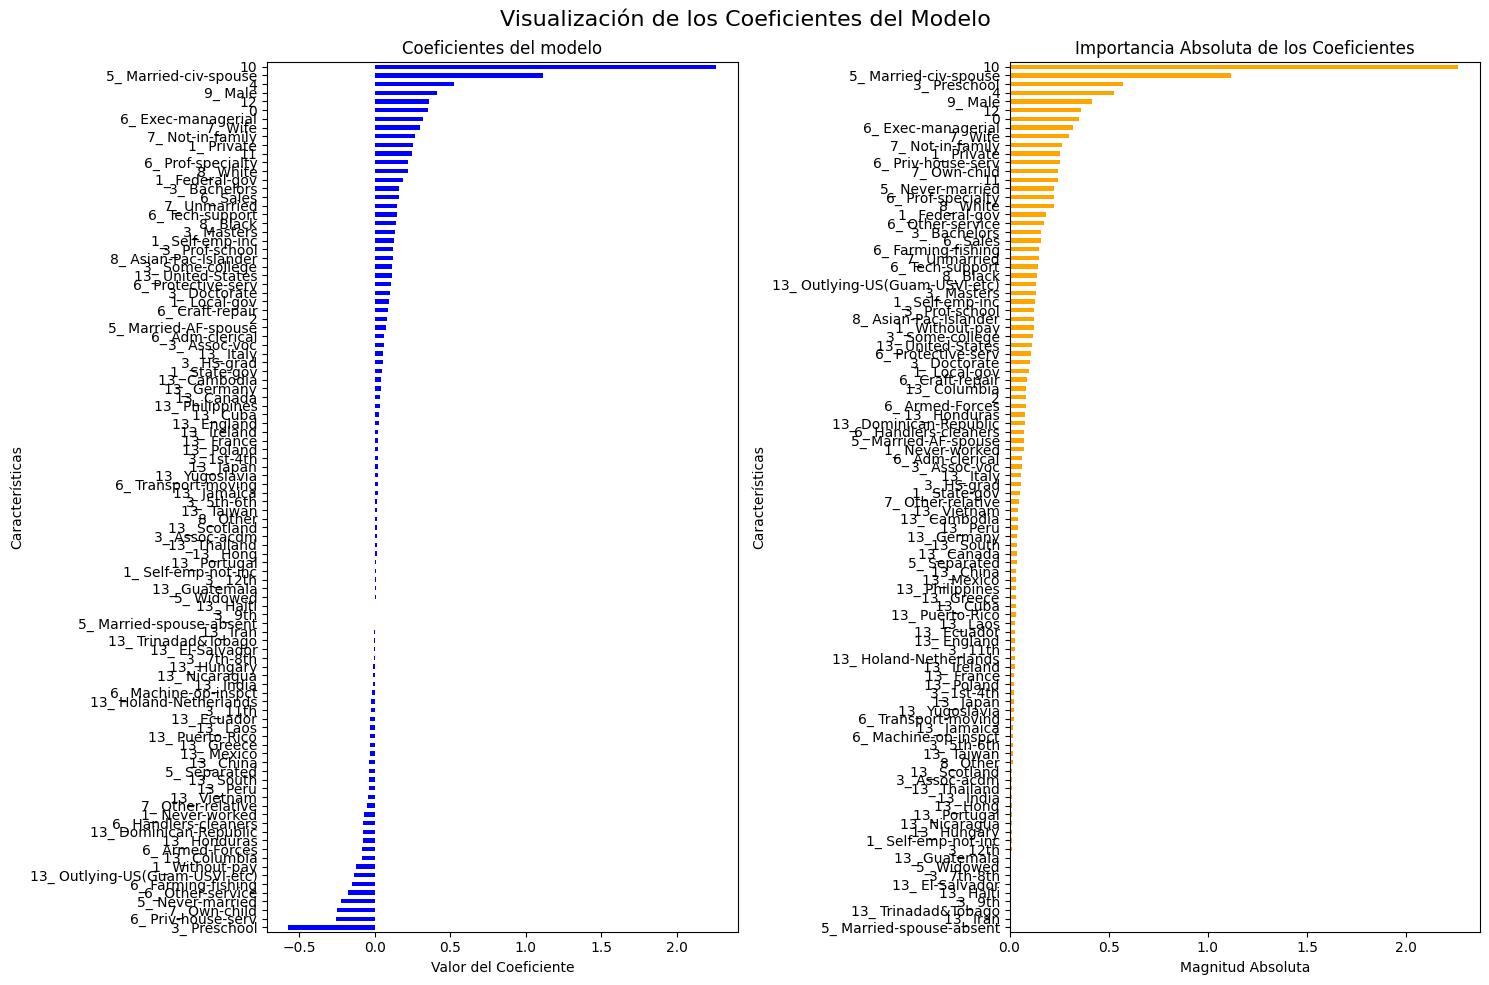

In [22]:
# Obtener los nombres de las características desde X_train
feature_names = X_train.columns

# Llamar a la función con el modelo entrenado y los nombres de las características
coeficientes_df = show_coefs(model, feature_names)

# Mostrar el DataFrame con los coeficientes
print("\nCoeficientes del modelo:")
print(coeficientes_df)

